# MACHINE LEARNING AND QUANTUM COMPUTERS - ASSIGNMENT 1 (26/11/25)

## PROBLEM 0

> Create a script that generates random data from different distributions. Mainly, compare:
> - A normal or Gaussian distribution for different values of the variance and mean
> - A uniformly random distribution
> - The beta distribution
> 

### Preliminaries

Let's start by importing all the libraries that we will need:

In [1]:
# When we want to use a library, we need to import it first, as shown below. The 'library_handle' is the name that we'll use to call the functions of that library, to make our lives easier. We can choose whatever we want.
#   > import library_name as library_handle

# WARNING: if you run into some errors, try installing the libraries that we are importing inside your python environtment first using the following command inside a terminal (with your desired python evironment activated)
#   > pip install library_name

# Useful links:
#   - Numpy's documentation: https://numpy.org/doc/2.3/
#   - Scipy's documentation: https://docs.scipy.org/doc//scipy/index.html
#   - Matplotlib's documentation: https://matplotlib.org/stable/index.html
#   - Python's documentation (v.3.13.9): https://docs.python.org/3.13/

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

Also, let's check that all of those packages were correctly installed:

In [2]:
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.4
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


We'll start by understanding the differences between each probability distribution (and its parameters) by plotting them and then we'll generate random data from each one to compare them.

### Gaussian distribution

$$f(x)=\frac{e^{-x^2/2}}{\sqrt{2\pi}}$$

Now that we have our environment ready to go, let's start by generating a Gaussian or normal distribution for different values of the variance, $\sigma$, and mean, $\mu$.

Notice that we are really only interested in the Probability Density Function (PDF), but nonetheless we'll plot the Cumulative Density Function (CDF) aswell.

To do it, let's first define a function that we can call afterwards with diferrent choices for $\{\mu,\sigma\}$:

In [129]:
# With
#   > def function_name(default_values):
# we can define a Python function. Thanks to this definition, we can simply call it afterwards without needing to re-code it every time we want to change some parameters (variance and mean in this exemple).

# Default values: mean = 0, std = 1.

def plot_gaussian_pdf_cdf(mu=0, sigma=1):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) # We define our Probability Density Function (PDF) and we compute its value in each of our x points. Check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book for the equations being used
    x_cdf = sp.stats.norm.cdf(x, loc=mu, scale=sigma) # Instead of defining our Cumulative Density Function (CDF), check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book, we take the function 'norm' (for a normal continuous random variable, the one we are interested in) inside SciPy statistical's library ('stats') and compute it's CDF in every point stored inside 'x' by using the function 'cdf'. Notice how the parameter 'loc' == mean and 'scale' == std. We did it this way for the sake of learning different methods to achive what we want
    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.plot(x, x_cdf, label='CDF') # Plot the CDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Gaussian Distribution') # Set a title for the whole plot

Then, we can plot any Gaussian PDF and CDF that we desire by choosing some specific values for the mean and the standard deviation:

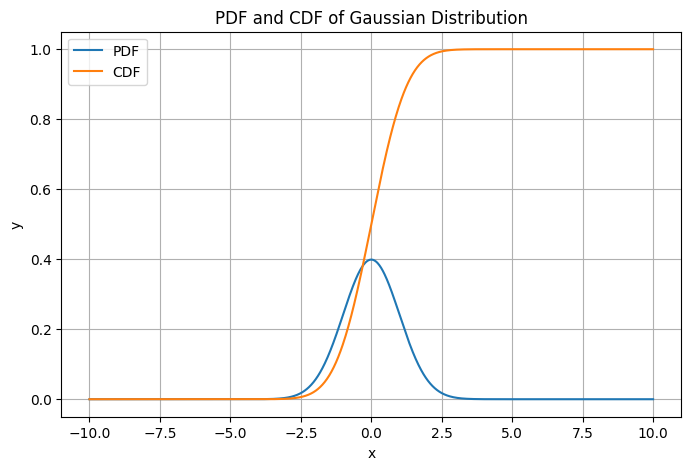

In [ ]:
# mean = 0, std = 1

plot_gaussian_pdf_cdf(mu=0, sigma=1)

Smaller values of the std make our distribution narrower (bigger values would make it wider):

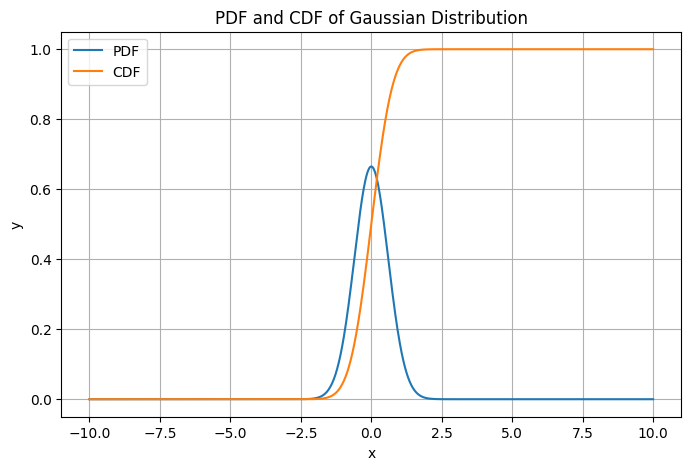

In [ ]:
# mean = 0, std = 0.6

plot_gaussian_pdf_cdf(mu=0, sigma=0.6)

Smaller values of the mean shift our distribution to the left (bigger ones would shift it to the right):

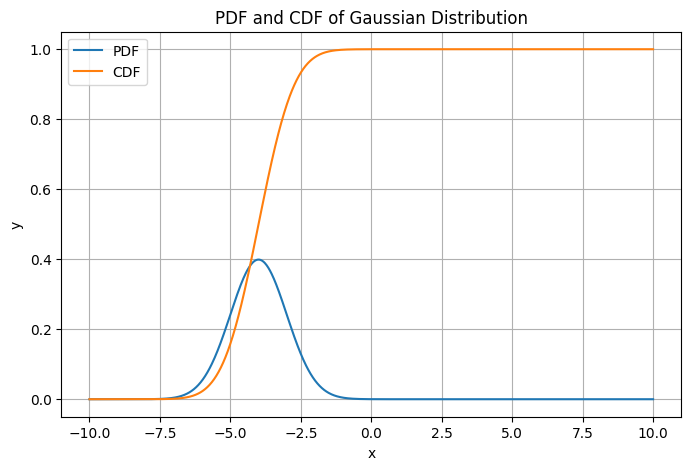

In [ ]:
# mean = -4, std = 1
# Smaller of 

plot_gaussian_pdf_cdf(mu=-4, sigma=1)

### Uniformly random distribution

$$\begin{align*}
f(x) &= 
\begin{cases}
\displaystyle \frac{1}{b-a}, & \text{for } a \le x \le b\\[6pt]
0, & \text{for } x<a \text{ or } x>b
\end{cases}
\end{align*}$$

Let's now try a uniformly random distribution (also called rectangular distribution). We'll start by defining a similar function as in the previous case:

In [158]:
# Default values: a = 0, b = 1.

def plot_uniform_pdf_cdf(a=0, b=1):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.uniform.pdf(x, loc=a, scale=b-a) # Uniform PDF
    x_cdf = sp.stats.uniform.cdf(x, loc=a, scale=b-a) # Uniform CDF
    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.plot(x, x_cdf, label='CDF') # Plot the CDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Uniform Distribution') # Set a title for the whole plot

Then, we can plot any uniform PDF and CDF that we desire by choosing some specific values for $a$ and $b$:

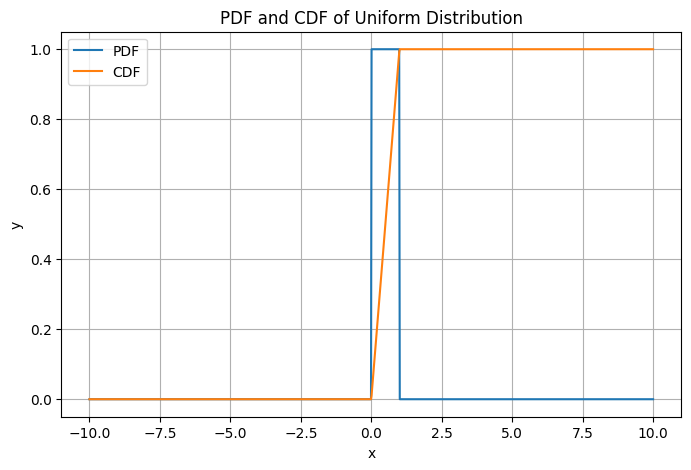

In [159]:
# a = 0, b = 1

plot_uniform_pdf_cdf(a=0, b=1)

Bigger values of the difference between $b$ and $a$ make our distribution wider and smaller (smaller values would make it narrower and taller):

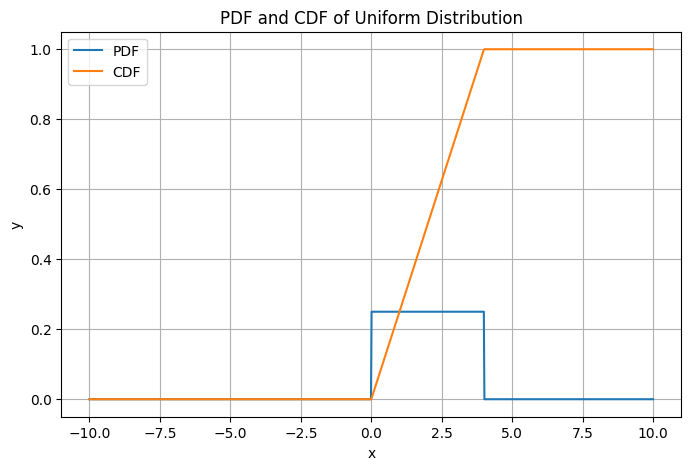

In [160]:
# a = -2, b = 4

plot_uniform_pdf_cdf(a=0, b=4)

### Beta distribution

$$f(x,\alpha,\beta)=\frac{\Gamma(\alpha+\beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}$$

Let's now try a beta distribution. We'll start by defining a similar function as in the other cases:

In [ ]:
# Default values: a = 0, b = 1. Notice that a,b > 0.

def plot_beta_pdf_cdf(a=1, b=1):
    x = np.linspace(-1, 1, 1000) # Generate a vector from -1 to 1 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.beta.pdf(x, a, b) # Beta PDF
    x_cdf = sp.stats.beta.cdf(x, a, b) # Beta CDF
    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.plot(x, x_cdf, label='CDF') # Plot the CDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title('PDF and CDF of Beta Distribution') # Set a title for the whole plot

Then, we can plot any Beta PDF and CDF that we desire by choosing some specific values for $\alpha$ and $\beta$:

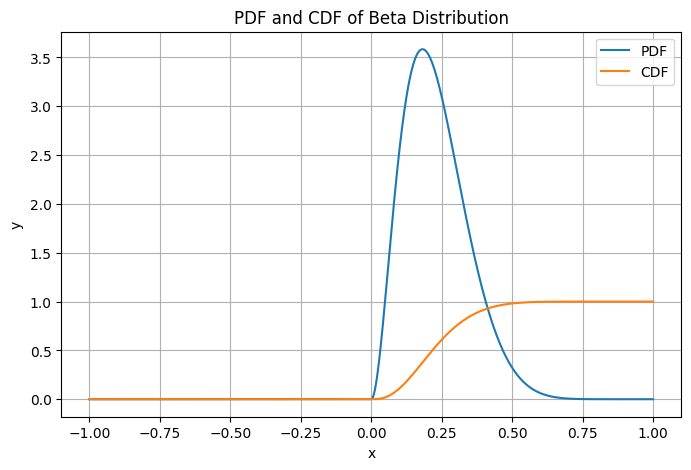

In [ ]:
# alpha = 3, beta = 10

plot_beta_pdf_cdf(a=3, b=10)

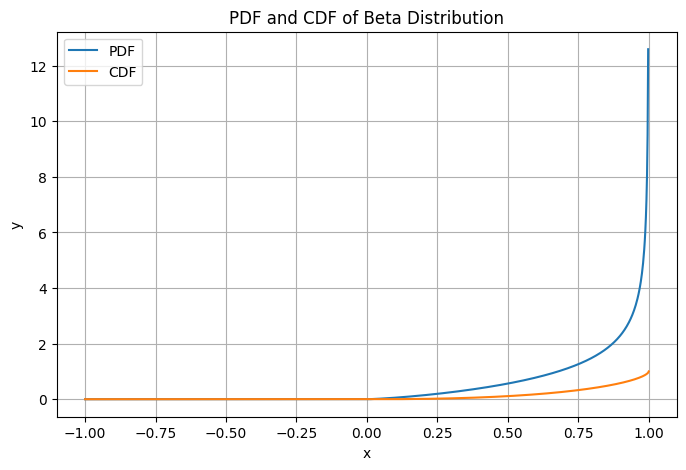

In [ ]:
# alpha = 2.3, beta = 0.6

plot_beta_pdf_cdf(a=2.3, b=0.6)

### Generating random data

Finally, let's generate random data from the different distributions discussed previously and compare them. First, we'll generate the random data:

In [123]:
y_normal = np.random.normal(0,0.6,1000)
y_uniform = np.random.uniform(-1,2,1000)
y_beta = np.random.beta(3,10,1000)
x = np.linspace(-10,10,1000)

With this, we can plot it to see the differences between the different sets of data:

Text(0.5, 1.0, 'PDF and CDF of Gaussian Distribution')

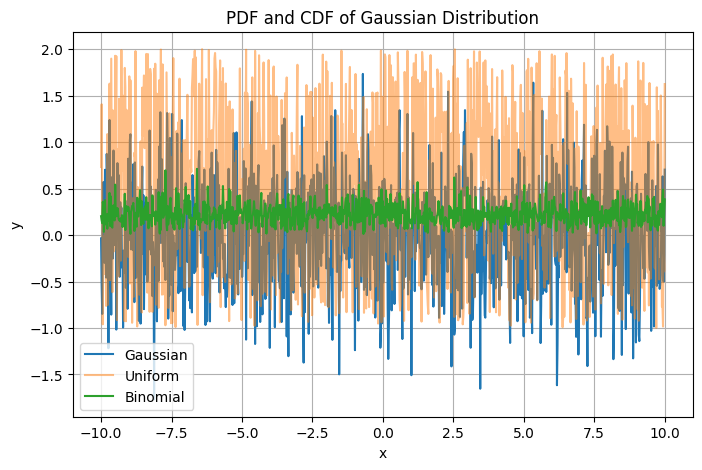

In [124]:
fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(x, y_normal, label='Gaussian') # Plot the PDF and assign it a label
ax.plot(x, y_uniform, label='Uniform', alpha=0.5)
ax.plot(x, y_beta, label='Binomial')
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('PDF and CDF of Gaussian Distribution') # Set a title for the whole plot

and also plot the data as a histogram to clearly see the general form discussed above that the different data sets should follow

Text(0.5, 1.0, 'Comparision of randomly generated data')

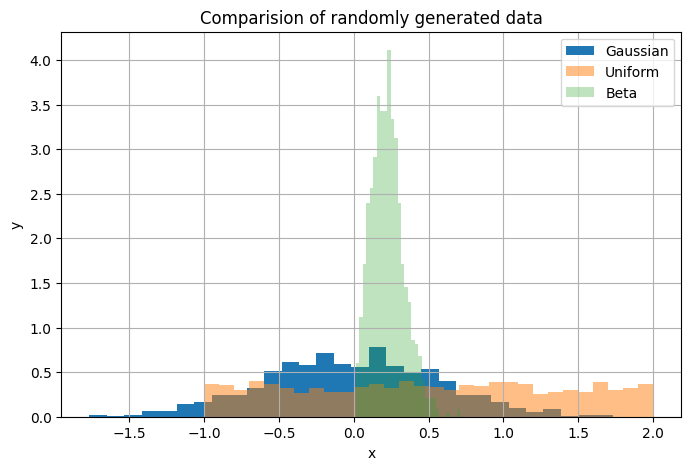

In [132]:
fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)

countN, binsN, ignoredN = plt.hist(y_normal, 30, density=True, label='Gaussian')
countU, binsU, ignoredU = plt.hist(y_uniform, 30, density=True, alpha=0.5, label='Uniform')
countB, binsB, ignoredB = plt.hist(y_beta, 30, density=True, alpha=0.3, label='Beta')

ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('Comparision of randomly generated data') # Set a title for the whole plot

In [156]:
def plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=1, a=0, b=1, c=2, d=4):
    fig, ax = plt.subplots(figsize=(8,5))

    ax.hist(y_normal, bins=30, density=True, alpha=0.6, label='Gaussian')
    ax.hist(y_uniform, bins=30, density=True, alpha=0.5, label='Uniform')
    ax.hist(y_beta, bins=30, density=True, alpha=0.4, label='Beta')

    xmin = min(np.min(y_normal), np.min(y_uniform), np.min(y_beta))
    xmax = max(np.max(y_normal), np.max(y_uniform), np.max(y_beta))
    x = np.linspace(xmin, xmax, 1000)

    x_pdf_G = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdf_U = sp.stats.uniform.pdf(x, loc=a, scale=b-a)
    x_pdf_B = sp.stats.beta.pdf(x, c, d)

    ax.plot(x, x_pdf_G, color='C0', lw=2, label='Gauss PDF')
    ax.plot(x, x_pdf_U, color='C1', lw=2, label='Uniform PDF')
    ax.plot(x, x_pdf_B, color='C2', lw=2, label='Beta PDF')

    ax.grid(True)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title("Random data with its originating distributions")
    plt.show()


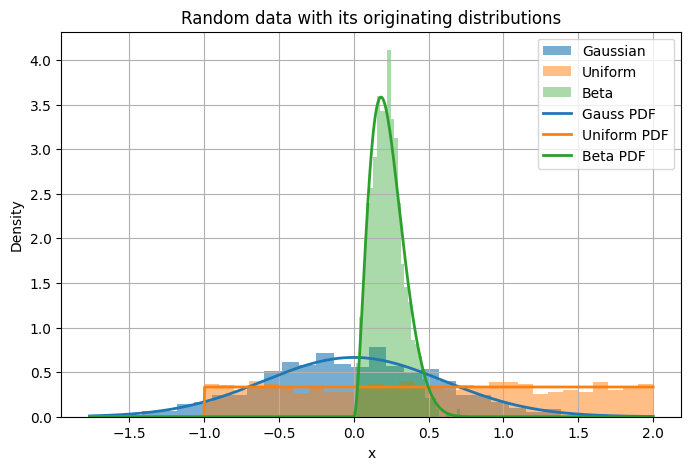

In [157]:
plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=0.6, a=-1, b=2, c=3, d=10)